# Prosper Loan Default Prediction

## Group 8

_Jahnavi Kalyani_

_Sakshi Mishra_

_Yash Raval_

***

## Busniess Understanding

***

## Data Understanding

***

## Data Preparation

**Importing libraries we will be using**

In [3]:
import pandas as pd
import numpy as np
import math

**Importing the data onto a pandas dataframe**

In [75]:
data = pd.read_csv('ProsperLoanData.csv')

In [6]:
len(data)

113937

In [7]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
data.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

### Data Cleaning

In [6]:
# Keeping a copy of the original dataframe
orig_data = data

In [76]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [77]:
# Removing ListingKey, ListingNumber as they are meaningless for our analysis
data = data.drop(['ListingKey', 'ListingNumber'], axis=1)
data.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [12]:
# Dates - split them on Year/Months/Days and check the IG after the initial run to see if they are more informative.

In [ ]:
# ListingCreationDate - Months/days/year split

In [9]:
data.CreditGrade.isnull().sum()

84984

In [10]:
# Credit grade has more than 84000 Nulls. Seems like we should get rid of it! But if we want we can still check its IG 
#to be sure.

for col in data:
    number_nan = data[col].isnull().sum()
    number_distinct = data[col].nunique(dropna=True)
    #stats = input_data[col].describe()
    print (col, number_nan, number_distinct)

ListingCreationDate 0 113064
CreditGrade 84984 8
Term 0 3
LoanStatus 0 12
ClosedDate 58848 2802
BorrowerAPR 25 6677
BorrowerRate 0 2294
LenderYield 0 2283
EstimatedEffectiveYield 29084 1582
EstimatedLoss 29084 120
EstimatedReturn 29084 1476
ProsperRating (numeric) 29084 7
ProsperRating (Alpha) 29084 7
ProsperScore 29084 11
ListingCategory (numeric) 0 21
BorrowerState 5515 51
Occupation 3588 67
EmploymentStatus 2255 8
EmploymentStatusDuration 7625 605
IsBorrowerHomeowner 0 2
CurrentlyInGroup 0 2
GroupKey 100596 706
DateCreditPulled 0 112992
CreditScoreRangeLower 591 26
CreditScoreRangeUpper 591 26
FirstRecordedCreditLine 697 11585
CurrentCreditLines 7604 54
OpenCreditLines 7604 52
TotalCreditLinespast7years 697 118
OpenRevolvingAccounts 0 48
OpenRevolvingMonthlyPayment 0 2834
InquiriesLast6Months 697 50
TotalInquiries 1159 102
CurrentDelinquencies 697 47
AmountDelinquent 7622 7059
DelinquenciesLast7Years 990 100
PublicRecordsLast10Years 697 25
PublicRecordsLast12Months 7604 7
RevolvingC

In [11]:
data['CreditGrade'].value_counts(dropna=False) # Check if the nulls are informative? Or other values are? If not get rid of it

NaN    84984
C       5649
D       5153
B       4389
AA      3509
HR      3508
A       3315
E       3289
NC       141
Name: CreditGrade, dtype: int64

In [12]:
data['Term'].value_counts(dropna=False) # Length of loan in months

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [78]:
data['LoanStatus'].value_counts(dropna=False) # Target

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [83]:
unique_target = data['LoanStatus'].unique()

for i in unique_target:
    if i in ['Chargedoff', 'Defaulted']:
        data['LoanStatus'] = data['LoanStatus'].replace(i, 1)
    else:
        data['LoanStatus'] = data['LoanStatus'].replace(i, 0)

In [84]:
data['LoanStatus'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    0
Name: LoanStatus, dtype: int64

In [36]:
# ClosedDate - NAN values are probably ongoing ones. 

In [14]:
data['ProsperRating (numeric)'].value_counts(dropna=False)

NaN     29084
 4.0    18345
 5.0    15581
 6.0    14551
 3.0    14274
 2.0     9795
 1.0     6935
 7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [15]:
data['ProsperRating (Alpha)'].value_counts(dropna=False)

NaN    29084
C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
Name: ProsperRating (Alpha), dtype: int64

In [31]:
# Check for proper mapping of num - alpha
a = data['ProsperRating (Alpha)'].values.tolist()
n = data['ProsperRating (numeric)'].values.tolist()
map_an = {'AA': 7.0, 'HR': 1.0, 'E':2.0, 'D':3.0, 'A':6.0, 'B':5.0, 'C':4.0}
count_non_nan = 0

for i in range(0, len(n)):
    if a[i] in map_an.keys():
        if n[i] == map_an[a[i]]:
            count_non_nan += 1
        else:
            print (i, a[i], n[i])
print (len(n)-count_non_nan)

29084


In [61]:
s = data['ProsperScore'].values.tolist()
data['ProsperScore'].value_counts(dropna=False)

NaN      29084
 4.0     12595
 6.0     12278
 8.0     12053
 7.0     10597
 5.0      9813
 3.0      7642
 9.0      6911
 2.0      5766
 10.0     4750
 11.0     1456
 1.0       992
Name: ProsperScore, dtype: int64

In [57]:
#map_s = {}
#for i in data['ProsperScore'].unique():
#    map_s[i] = []
#map_s

In [64]:
# Do we want to check how this corrrelates to rating?
map_s = {1.0: [], 2.0: [], 3.0: [], 4.0: [], 5.0: [], 6.0: [], 7.0: [], 8.0: [], 9.0: [], 10.0: [], 11.0: []}
count_nan = 0

for i in range(0, len(n)):
    if s[i] in map_s.keys():
        if n[i] not in map_s[s[i]]:
            map_s[s[i]].append(n[i])
    else:
        count_nan += 1
print (map_s, count_nan)

{1.0: [2.0, 1.0, 3.0, 4.0, 6.0, 5.0], 2.0: [2.0, 1.0, 3.0, 4.0, 5.0, 6.0], 3.0: [2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 7.0], 4.0: [3.0, 4.0, 5.0, 2.0, 1.0, 6.0, 7.0], 5.0: [1.0, 3.0, 4.0, 5.0, 2.0, 6.0, 7.0], 6.0: [6.0, 3.0, 4.0, 5.0, 2.0, 1.0, 7.0], 7.0: [6.0, 4.0, 5.0, 3.0, 7.0, 2.0, 1.0], 8.0: [6.0, 3.0, 5.0, 7.0, 4.0, 2.0, 1.0], 9.0: [6.0, 7.0, 5.0, 4.0, 3.0, 2.0, 1.0], 10.0: [5.0, 7.0, 6.0, 4.0, 3.0, 2.0, 1.0], 11.0: [7.0, 6.0, 5.0, 4.0]} 29084


In [33]:
data['ListingCategory (numeric)'].value_counts(dropna=False) # Type of Loan

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [36]:
#BorrowerState - 51 States
data['BorrowerState'].value_counts(dropna=False)

CA     14717
TX      6842
NY      6729
FL      6720
IL      5921
NaN     5515
GA      5008
OH      4197
MI      3593
VA      3278
NJ      3097
NC      3084
WA      3048
PA      2972
MD      2821
MO      2615
MN      2318
MA      2242
CO      2210
IN      2078
AZ      1901
WI      1842
OR      1817
TN      1737
AL      1679
CT      1627
SC      1122
NV      1090
KS      1062
KY       983
OK       971
LA       954
UT       877
AR       855
MS       787
NE       674
ID       599
NH       551
NM       472
RI       435
HI       409
WV       391
DC       382
MT       330
DE       300
VT       207
AK       200
SD       189
IA       186
WY       150
ME       101
ND        52
Name: BorrowerState, dtype: int64

In [37]:
data['Occupation'].value_counts(dropna=False)
# We might want to club different types of say, students or salespersons together to see if they are more informative?

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
NaN                                    3588
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management         

In [38]:
data['EmploymentStatus'].value_counts(dropna=False)
# We might want to see IG and decide if we want to club or not

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
NaN               2255
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [39]:
data['EmploymentStatus'].value_counts(dropna=False)

NaN       7625
 0.0      1534
 4.0      1186
 1.0      1177
 3.0      1174
 2.0      1153
 5.0      1151
 7.0      1116
 8.0      1103
 6.0      1103
 12.0     1076
 9.0      1025
 13.0     1020
 10.0     1008
 11.0      991
 14.0      989
 15.0      933
 17.0      930
 19.0      899
 18.0      894
 26.0      889
 16.0      886
 24.0      874
 22.0      868
 23.0      855
 21.0      851
 25.0      843
 20.0      836
 27.0      812
 28.0      796
          ... 
 626.0       1
 606.0       1
 578.0       1
 634.0       1
 647.0       1
 557.0       1
 690.0       1
 561.0       1
 552.0       1
 672.0       1
 572.0       1
 574.0       1
 685.0       1
 544.0       1
 653.0       1
 568.0       1
 580.0       1
 662.0       1
 590.0       1
 570.0       1
 622.0       1
 619.0       1
 573.0       1
 745.0       1
 755.0       1
 610.0       1
 530.0       1
 648.0       1
 560.0       1
 581.0       1
Name: EmploymentStatusDuration, dtype: int64

In [40]:
data['IsBorrowerHomeowner'].value_counts(dropna=False)

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [41]:
data['CurrentlyInGroup'].value_counts(dropna=False)
# False - not in group 

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

In [ ]:
#GroupKey has 100596 Nulls and 706 unique - Check IG to See if you want to get rid of it or not!

In [ ]:
#DateCreditPulled - check date format? - Maybe get days/weeks/months/years ??

In [42]:
data['CreditScoreRangeLower'].value_counts(dropna=False)

 680.0    16492
 660.0    16366
 700.0    15471
 720.0    12923
 640.0    12199
 740.0     9267
 760.0     6606
 780.0     4624
 620.0     4172
 600.0     3602
 800.0     2644
 520.0     1593
 540.0     1474
 820.0     1409
 560.0     1357
 580.0     1125
NaN         591
 840.0      567
 500.0      554
 480.0      346
 860.0      212
 460.0      141
 0.0        133
 440.0       36
 880.0       27
 420.0        5
 360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [43]:
data['CreditScoreRangeLower'].value_counts(dropna=False)

 699.0    16492
 679.0    16366
 719.0    15471
 739.0    12923
 659.0    12199
 759.0     9267
 779.0     6606
 799.0     4624
 639.0     4172
 619.0     3602
 819.0     2644
 539.0     1593
 559.0     1474
 839.0     1409
 579.0     1357
 599.0     1125
NaN         591
 859.0      567
 519.0      554
 499.0      346
 879.0      212
 479.0      141
 19.0       133
 459.0       36
 899.0       27
 439.0        5
 379.0        1
Name: CreditScoreRangeUpper, dtype: int64

In [44]:
data['FirstRecordedCreditLine'].value_counts(dropna=False)

NaN                    697
1993-12-01 00:00:00    185
1994-11-01 00:00:00    178
1995-11-01 00:00:00    168
1990-04-01 00:00:00    161
1995-03-01 00:00:00    159
1989-10-01 00:00:00    153
1989-06-01 00:00:00    153
1990-03-01 00:00:00    148
1994-03-01 00:00:00    146
1996-03-01 00:00:00    146
1994-09-01 00:00:00    146
1989-08-01 00:00:00    144
1989-11-01 00:00:00    144
1989-03-01 00:00:00    144
1995-09-01 00:00:00    142
1989-09-01 00:00:00    140
1996-11-01 00:00:00    139
1994-08-01 00:00:00    138
1994-10-01 00:00:00    135
1993-11-01 00:00:00    134
1994-04-01 00:00:00    133
1994-07-01 00:00:00    133
1989-05-01 00:00:00    132
1990-05-01 00:00:00    132
1990-10-01 00:00:00    132
1985-10-01 00:00:00    130
1990-06-01 00:00:00    130
1988-03-01 00:00:00    129
1989-07-01 00:00:00    128
                      ... 
1975-03-26 00:00:00      1
1975-03-21 00:00:00      1
1977-04-26 00:00:00      1
1968-02-28 00:00:00      1
1976-04-11 00:00:00      1
1980-12-10 00:00:00      1
1

In [ ]:
#Score range individual, combinations? - check!!

In [ ]:
#CurrentCreditLines - 54

In [ ]:
#OpenCreditLines - 52

In [ ]:
#TotalCreditLinespast7years - 118

In [ ]:
#OpenRevolvingAccounts - 48

In [ ]:
#OpenRevolvingMonthlyPayment - 2834

In [ ]:
#InquiriesLast6Months - 50

In [ ]:
#TotalInquiries - 102

In [ ]:
#CurrentDelinquencies - 47

In [ ]:
#AmountDelinquent - maybe have ranges? make it categorical? (Same for above)

In [ ]:
#DelinquenciesLast7Years - 100

In [100]:
# Unique and non informative!
data = data.drop(['MemberKey'],axis=1)
data = data.drop(['LoanKey'],axis=1)

In [88]:
columns = list(data)
nullcol = dict(data.isnull().sum())
majornull = {}
for i in range(len(columns)):
    if(nullcol[columns[i]] >= (len(data)/2)):
        majornull[d[i]] = nullcol[d[i]]
majornul

# Depicts all the attributes with the number of NULL Values > 50% 

{'ClosedDate': 58848,
 'CreditGrade': 84984,
 'GroupKey': 100596,
 'LoanFirstDefaultedCycleNumber': 96985,
 'OnTimeProsperPayments': 91852,
 'ProsperPaymentsLessThanOneMonthLate': 91852,
 'ProsperPaymentsOneMonthPlusLate': 91852,
 'ProsperPrincipalBorrowed': 91852,
 'ProsperPrincipalOutstanding': 91852,
 'ScorexChangeAtTimeOfListing': 95009,
 'TotalProsperLoans': 91852,
 'TotalProsperPaymentsBilled': 91852}

In [101]:
data['LoanOriginationQuarter'].value_counts()
#This is the count for invidual quarter and year values 

Q4 2013    14450
Q1 2014    12172
Q3 2013     9180
Q2 2013     7099
Q3 2012     5632
Q2 2012     5061
Q1 2012     4435
Q4 2012     4425
Q2 2008     4344
Q4 2011     3913
Q1 2013     3616
Q3 2008     3602
Q2 2007     3118
Q3 2011     3093
Q1 2007     3079
Q1 2008     3074
Q3 2007     2671
Q4 2007     2592
Q2 2011     2478
Q4 2006     2403
Q3 2006     1934
Q1 2011     1744
Q4 2010     1600
Q2 2010     1539
Q4 2009     1449
Q3 2010     1270
Q2 2006     1254
Q1 2010     1243
Q3 2009      585
Q4 2008      532
Q1 2006      315
Q4 2005       22
Q2 2009       13
Name: LoanOriginationQuarter, dtype: int64

In [90]:
data['IncomeRange'] = data['IncomeRange'].replace('$0','Not employed')
data['IncomeRange'].value_counts()

#Here we are replacing/merging 0$ and Not Employed under the category of Not Employed

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed       1427
Name: IncomeRange, dtype: int64

In [91]:
data['IncomeVerifiable'].value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

### Entropy and Information Gain

The **target** of this dataset is be a feature called 'LoanStatus' which we have made **binary** (1 for defaults and 0 for non defaults)

In [103]:
variable_names = list(data)
target_name = 'LoanStatus'
feature_data = []

# Our variables (features) will be stored in one variable called X
for i in range(0, len(data.columns)):
    if i != 3:
        feature_data.append(variable_names[i])

X = data[feature_data]

# Our target will be stored in one variable called Y
Y = data[target_name]

Let's take a look at the data

In [104]:
X.head()

,ListingCreationDate,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,2007-08-26 19:09:29.263000000,C,36,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,2014-02-27 08:28:07.900000000,NaN,36,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,2007-01-05 15:00:47.090000000,HR,36,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,2012-10-22 11:02:35.010000000,NaN,36,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,2013-09-14 18:38:39.097000000,NaN,36,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [105]:
Y.tail()

113932    0
113933    0
113934    0
113935    0
113936    0
Name: LoanStatus, dtype: int64

**Features and splits**

Let's take a look at a few features to see if they are informative. Attributes we want to plot: **'CurrentDelinquencies'**, **'CurrentCreditLines'**, **'EstimatedEffectiveYield'**

Let's plot the possible values of 'CurrentDelinquencies', 'CurrentCreditLines', 'EstimatedEffectiveYield' and color code our target variable, which is 'LoanStatus'.

The horizontal value is the values they take. We can distinguish the red dots meaning people who haven't defaulted and blue dots meaning people who did default. The vertical position here doesn't mean anything.

In [108]:
import matplotlib.patches as patches
import matplotlib.pylab as plt
%matplotlib inline

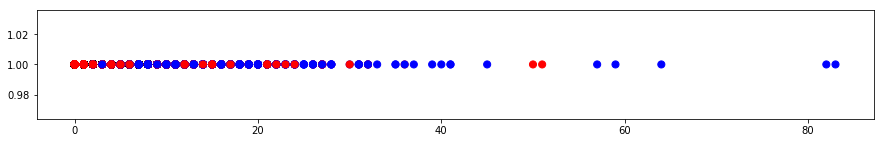

In [110]:
# For CurrentDelinquencies
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = ["red" if x == 0 else "blue" for x in data['LoanStatus']]
plt.scatter(X['CurrentDelinquencies'], [1] * len(data), c=color, s=50)

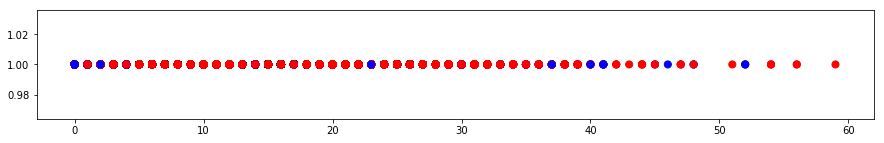

In [111]:
# For CurrentCreditLines
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = ["red" if x == 0 else "blue" for x in data['LoanStatus']]
plt.scatter(X['CurrentCreditLines'], [1] * len(data), c=color, s=50)

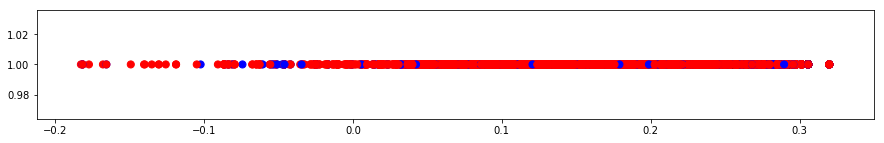

In [112]:
# For EstimatedEffectiveYield
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = ["red" if x == 0 else "blue" for x in data['LoanStatus']]
plt.scatter(X['EstimatedEffectiveYield'], [1] * len(data), c=color, s=50)

**Defining functions for entropy and information gain**

In [202]:
def entropy_continuous(target):
    '''
        Computes the entropy for a set of instances (that's needed is the values of the target variable)
        Presumes the target values are class indexes -- integers
        Thus, target is an array of integers
    '''
    # Get the number of instances
    n = len(target)
    # Count how frequently each unique target value occurs using the numpy function 
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    
    # Otherwise, for each possible value, update entropy; use zero for 0 log 0
    for count in counts:
        if count == 0:
            entropy += 0
        else:
            entropy += math.log(count/n, 2) * count/n
    # Return entropy
    return -1 * entropy


def entropy_categorical(target):
    '''
        Computes the entropy for a binary target variable
    '''
    # Get the number of instances
    n = len(target)
    # Count how frequently each unique target value occurs using the numpy function 
    counts = [0, 0]
    for i in range(n):
        counts[target[i]] += 1.0
    # Initialize entropy
    entropy = 0
    
    # Otherwise, for each possible value, update entropy; use zero for 0 log 0
    for count in counts:
        if count == 0:
            entropy += 0
        else:
            entropy += math.log(count/n, 2) * count/n
    # Return entropy
    return -1 * entropy


def information_gain_continuous(feature, threshold, target):
    '''
    This function takes three things:
    feature - A list of all the values this feature takes on, in some instance order
    threshold - A number at which to threshold a continuous variable
    target - A list of all the target values, in the same order as feature
    '''
    # Using numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Record if each feature value is above the threshold
    feature = (feature <= threshold)
    # Initialize information gain with the parent entropy
    ig = entropy_continuous(target)
    # For each side of the threshold, update the information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy_continuous(target[feature == level])
    # Return information gain
    return ig


def information_gain_categorical(feature, target):
    '''
    This function takes three things:
    feature - A list of all the values this feature takes on, in some instance order
    target - A list of all the target values, in the same order as feature
    '''
    # Converting it to a list
    target = target.values.tolist()
    feature = feature.values.tolist()
    # Initialize information gain with the parent entropy
    ig = entropy_categorical(target)
    # For each category, update the information gain
    category = {}
    target_dict = {}
    counter = 0
    for i in feature:
        if i not in category.keys():
            category[i] = 1
            target_dict[i] = [target[counter]]
        else:
            category[i] += 1
            target_dict[i].append(target[counter])
        counter += 1
    for k in category.keys():
        ig -= category[k]/len(feature) * entropy_categorical(target_dict[k])
    # Return information gain
    return ig

In [209]:
#'CurrentDelinquencies'

information_gain_continuous(X['CurrentDelinquencies'], 1.00, np.array(Y))

/Users/jahnavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in less_equal


0.022807995374523327

In [211]:
a = data['CurrentDelinquencies'].values.tolist()
for i in range(len(a)):
    if a[i] <= 1.00:
        a[i] = 1
    else:
        a[i] = 0
x = pd.DataFrame(a, columns=['a'])
information_gain_categorical(x['a'], data['LoanStatus'])

0.022807995374523327

Let's pick thresholds, and split 'CurrentDelinquencies', 'CurrentCreditLines' and 'EstimatedEffectiveYield', and calculate $IG$.

In [128]:
threshold = 1
print ("IG = %.4f with thresholding of %.2f." % (information_gain(X['CurrentDelinquencies'], threshold, np.array(Y)), threshold))

IG = 0.0228 with thresholding of 1.00.


/Users/jahnavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less_equal


In [129]:
threshold = 20
print ("IG = %.4f with thresholding of %.2f." % (information_gain(X['CurrentCreditLines'], threshold, np.array(Y)), threshold))

IG = 0.0121 with thresholding of 20.00.


/Users/jahnavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less_equal


In [124]:
threshold = 0.1
print ("IG = %.4f with thresholding of %.2f." % (information_gain(X['EstimatedEffectiveYield'], threshold, np.array(Y)), threshold))

IG = 0.0148 with thresholding of 0.10.


/Users/jahnavi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less_equal


**Picking the best threshold for continuous variables**

In [141]:
def best_threshold(feature):
    maximum_ig = 0
    maximum_threshold = 0
    for threshold in feature:
        ig = information_gain(feature, threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold
    print (maximum_ig, maximum_threshold)
    return maximum_threshold

Let's now run this for all features and see which of the features are most informative!

In [142]:
features = []
igs = []

for feature in X:
    features.append(feature)
    threshold = best_threshold(X[feature])
    igs.append(information_gain(X[feature], threshold, np.array(Y)))

0.105535976991 2012-11-12 11:03:14.883000000


TypeError: '<=' not supported between instances of 'float' and 'str'

**Plotting Information Gains for Most Informative Attributes**

In [ ]:
plt.bar(range(len(features)), igs)
plt.xticks(range(len(features)), features, rotation=70)
plt.show()

In [132]:
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image

In [133]:
# A function that gives a visual representation of the decision tree

def Decision_Tree_Image(decision_tree, feature_names, name="temp"):    
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    # Call graphviz to make an image file from our decision tree
    os.system("dot -T png images/" + name + ".dot -o images/" + name + ".png")
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')


# A function to plot the data

def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [12.0, 8.0]
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) , max(data[v1]) ])
    plt.ylim([min(data[v2]) , max(data[v2]) ])    

# A function that creates the surface of a decision tree

def Decision_Surface(data, target, model):
    # Get bounds
    x_min, x_max = data[data.columns[0]].min(), data[data.columns[0]].max()
    y_min, y_max = data[data.columns[1]].min(), data[data.columns[1]].max()
    # Create a mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01), np.arange(y_min, y_max,0.01))
    meshed_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    plt.figure(figsize=[12,7])
    Z = model.predict(meshed_data).reshape(xx.shape)
    plt.title("Decision surface")    
    plt.ylabel("humor")
    plt.xlabel("number_pets")
    cs = plt.contourf(xx, yy, Z, levels=[-1,0,1],cmap=plt.cm.coolwarm,origin='lower')
    color = ["blue" if t == 0 else "red" for t in target]
    plt.scatter(data[data.columns[0]], data[data.columns[1]], color=color )

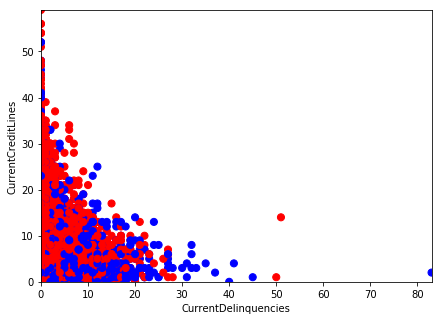

In [135]:
plt.figure(figsize=[7,5])
Plot_Data(data, 'CurrentDelinquencies', 'CurrentCreditLines', 'LoanStatus')

## Modeling

In [ ]:
from sklearn import metrics
from random import randint
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

## Evaluation 

20-80 or 10-90 (10 or 5 fold cross validation)